In [1]:
import numpypi_series as numpy
import matplotlib.pyplot as plt

`numpypi_series` is a wrapper around `numpy` that replaces a few instrinsic functions with the ambition of producing the same numerical results on different platforms under different versions of python.

To use, replace
```python
import numpy as np
```
with
```python
import numpypi_series as np
```

You can still access the original `numpy` via `numpypi` using `numpy._numpy._numpy`.

Here's a check that the "pass through" works:

In [2]:
# Check numpy functions are visible
print( numpy.arange(3) )
print( numpy._numpy._numpy.arange(3))

[0 1 2]
[0 1 2]


As far as we can tell `1/x` does reproduce across platforms but `y/x` does not. Hence, to reproducibly divide two numbers replace `z=y/x` with `r=1/x ; z=y*r`. In case `1/x` does not reproduce the reciprocal function, $f(x) = 1/x$, is coded iteratively in `numpypi`:

In [3]:
# Check reciprocal()
x = [1., 2., 0.5, 3., -3., 1./3, -1./3, 2**63, 2**(-63)]
y = numpy.reciprocal( x )
print('%23s'%'x', '%23s'%'1/x', '%23s'%'x*1/x - 1')
for i in range(len(x)):
    print('%23.16e'%x[i], '%23.16e'%y[i], '%23.16e'%(x[i]*y[i]-1.) )

                      x                     1/x               x*1/x - 1
 1.0000000000000000e+00  1.0000000000000000e+00  0.0000000000000000e+00
 2.0000000000000000e+00  5.0000000000000000e-01  0.0000000000000000e+00
 5.0000000000000000e-01  2.0000000000000000e+00  0.0000000000000000e+00
 3.0000000000000000e+00  3.3333333333333331e-01  0.0000000000000000e+00
-3.0000000000000000e+00 -3.3333333333333331e-01  0.0000000000000000e+00
 3.3333333333333331e-01  3.0000000000000000e+00  0.0000000000000000e+00
-3.3333333333333331e-01 -3.0000000000000000e+00  0.0000000000000000e+00
 9.2233720368547758e+18  1.0842021724855044e-19  0.0000000000000000e+00
 1.0842021724855044e-19  9.2233720368547758e+18  0.0000000000000000e+00


The square root function $f(x) = \sqrt{x}$ is also coded iteratively using the Legendre algorithm:

In [4]:
# Check sqrt()
x = [1., 4., 2., 0.5, 2**63, 2**(-63)]
y = numpy.sqrt( x )
print('%23s'%'x', '%23s'%'sqrt(x)', '%23s'%'(sqrt(x)**2 - x) / x')
for i in range(len(x)):
    print('%23.16e'%x[i], '%23.16e'%y[i], '%23.16e'%((y[i]*y[i]-x[i])/x[i]) )

                      x                 sqrt(x)    (sqrt(x)**2 - x) / x
 1.0000000000000000e+00  1.0000000000000000e+00  0.0000000000000000e+00
 4.0000000000000000e+00  2.0000000000000000e+00  0.0000000000000000e+00
 2.0000000000000000e+00  1.4142135623730949e+00 -2.2204460492503131e-16
 5.0000000000000000e-01  7.0710678118654746e-01 -2.2204460492503131e-16
 9.2233720368547758e+18  3.0370004999760494e+09 -2.2204460492503131e-16
 1.0842021724855044e-19  3.2927225399135959e-10 -2.2204460492503131e-16


Trigonometric functions are coded using series. They've been written for accuracy and agree with numpy to within $\epsilon \sim 2.2 \times 10^{-16}$

In [5]:
eps = numpy.finfo(1.).eps
print( 'eps =', eps )

eps = 2.220446049250313e-16


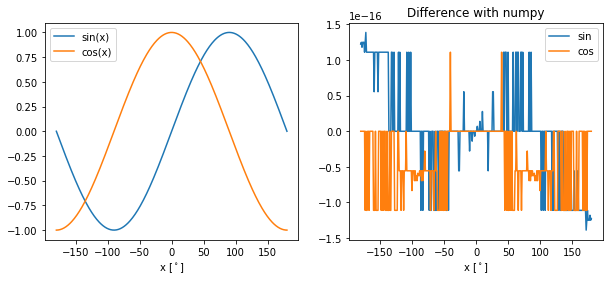

In [6]:
# Check sin(), cos()
x = numpy.arange(-180-360*0,181+360*0)*(numpy.pi/180.)
s,S = numpy.sin(x), numpy._numpy._numpy.sin(x)
c,C = numpy.cos(x), numpy._numpy._numpy.cos(x)
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(x*180/numpy.pi, s, label='sin(x)');
ax[0].plot(x*180/numpy.pi, c, label='cos(x)');
ax[0].legend(); ax[0].set_xlabel('x [$^\circ$]');
ax[1].plot(x*180/numpy.pi, s-S, label='sin');
ax[1].plot(x*180/numpy.pi, c-C, label='cos');
ax[1].legend(); ax[1].set_xlabel('x [$^\circ$]'); plt.title('Difference with numpy');

Mathematically $\sin^2(x) + \cos^2{x} = 1$ but numerically this is approximate for both `numpy` and `numpypi`.

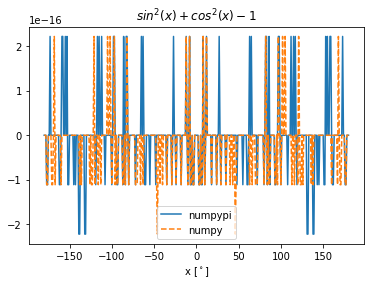

In [7]:
# Check sin()**2 + cos()**2
x = numpy.arange(-180-360*0,181+360*0)*(numpy.pi/180.)
s,S = numpy.sin(x), numpy._numpy._numpy.sin(x)
c,C = numpy.cos(x), numpy._numpy._numpy.cos(x)
y,Y = s*s + c*c, S*S + C*C
plt.plot(x*180/numpy.pi, y-1, label='numpypi');
plt.plot(x*180/numpy.pi, Y-1, '--', label='numpy');
plt.xlabel('x [$^\circ$]'); plt.title('$sin^2(x)+cos^2(x) - 1$'); plt.legend();

In [8]:
# Special values
x = numpy.arange(-4,5)*0.25*numpy.pi
s = numpy.sin(x)
c = numpy.cos(x)
# s = numpy._numpy.numpy.sin(x)
# c = numpy._numpy.numpy.cos(x)
print('%23s'%'x/pi','%23s'%'sin(x)','%23s'%'cos(x)',)
for i in range(len(x)):
    print('%23.16f'%(x[i]/numpy.pi),'%23.16e'%s[i],'%23.16e'%c[i])

                   x/pi                  sin(x)                  cos(x)
    -1.0000000000000000  0.0000000000000000e+00 -1.0000000000000000e+00
    -0.7500000000000000 -7.0710678118654757e-01 -7.0710678118654746e-01
    -0.5000000000000000 -1.0000000000000000e+00  0.0000000000000000e+00
    -0.2500000000000000 -7.0710678118654757e-01  7.0710678118654746e-01
     0.0000000000000000  0.0000000000000000e+00  1.0000000000000000e+00
     0.2500000000000000  7.0710678118654757e-01  7.0710678118654746e-01
     0.5000000000000000  1.0000000000000000e+00  0.0000000000000000e+00
     0.7500000000000000  7.0710678118654757e-01 -7.0710678118654746e-01
     1.0000000000000000 -0.0000000000000000e+00 -1.0000000000000000e+00


$\sin(-x) = - \sin(x)$ so $\sin(x) + \sin(-x) = 0$:

0.0

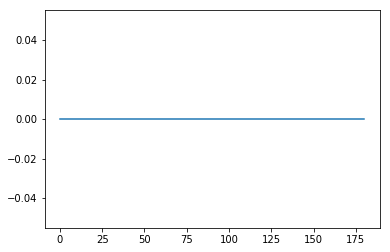

In [9]:
# Check symmetry for sin()
x = numpy.linspace(0.,1.,1000)*numpy.pi
sp = numpy.sin(x)
sm = numpy.sin(-x)
y = sp + sm
plt.plot(180/numpy.pi*x, y );
numpy.abs(y).max()

$\cos(-x) = \cos(x)$ so $\cos(x) - \cos(-x) = 0$:

0.0

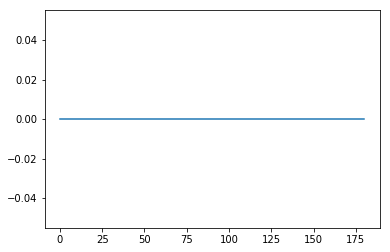

In [10]:
# Check symmetry for cos()
x = numpy.linspace(0.,1.,1000)*numpy.pi
cp = numpy.cos(x)
cm = numpy.cos(-x)
y = cp - cm
plt.plot(180/numpy.pi*x, y );
numpy.abs(y).max()

(Text(0.5, 0, 'x [$^\\circ$]'),
 Text(0.5, 1.0, 'Magnitude of difference with numpy'))

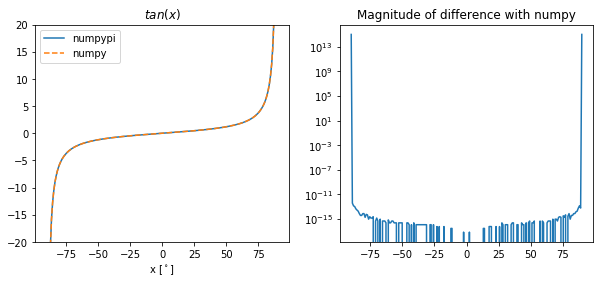

In [11]:
x = numpy.linspace(-numpy.pi/2*(1-1*eps), numpy.pi/2*(1-1*eps), 200)
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(x*180/numpy.pi, numpy.tan(x), label='numpypi' );
ax[0].plot(x*180/numpy.pi, numpy._numpy._numpy.tan(x), '--', label='numpy' );
ax[0].set_ylim(-20,20); ax[0].legend(); ax[0].set_xlabel('x [$^\circ$]'), ax[0].set_title('$tan(x)$')
ax[1].semilogy(x*180/numpy.pi, numpy.abs( numpy.tan(x) - numpy._numpy._numpy.tan(x) ) );
ax[0].set_xlabel('x [$^\circ$]'), ax[1].set_title('Magnitude of difference with numpy')

(-20, 20)

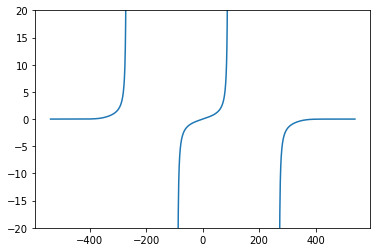

In [12]:
x = numpy.linspace(-numpy.pi*3+1e-2, numpy.pi*3-1e-2, 2000)
plt.plot(x*180/numpy.pi, numpy.tan(x) );
plt.ylim(-20,20)

$\tan(-x) = - \tan(x)$ so $\tan(x) + \tan(-x) = 0$:

0.0

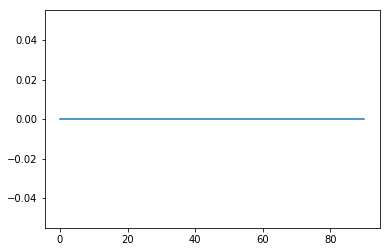

In [13]:
# Check symmetry for tan()
x = numpy.linspace(0.,1.,1000)*0.5*numpy.pi
tp = numpy.tan(x)
tm = numpy.tan(-x)
y = tp + tm
plt.plot(180/numpy.pi*x, y );
numpy.abs(y).max()

In [14]:
# More special values
print('Original numpy results')
print( numpy._numpy._numpy.cos( numpy.pi/4 ) - 0.5*numpy._numpy._numpy.sqrt(2) )
print( numpy._numpy._numpy.sin( numpy.pi/4 ) - 0.5*numpy._numpy._numpy.sqrt(2) )
print( numpy._numpy._numpy.tan( numpy.pi/4 ) - 1.0 )
print('numpypi results')
print( numpy.cos( numpy.pi/4 ) - 0.5*numpy.sqrt(2) )
print( numpy.sin( numpy.pi/4 ) - 0.5*numpy.sqrt(2) )
print( numpy.tan( numpy.pi/4 ) - 1.0 )

Original numpy results
0.0
-1.1102230246251565e-16
-1.1102230246251565e-16
numpypi results
0.0
1.1102230246251565e-16
-1.1102230246251565e-16


sqrt(0) = 0.0


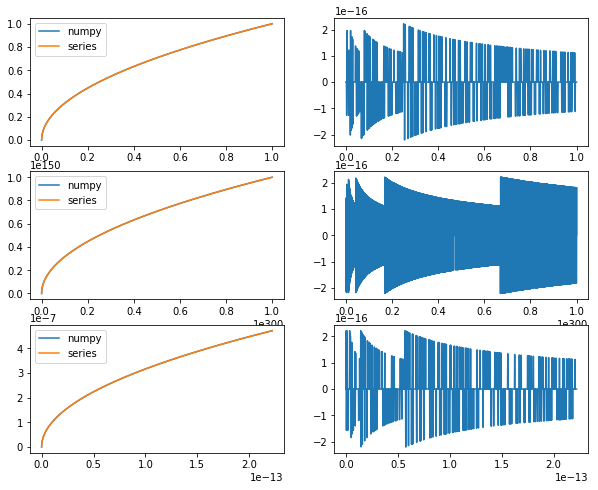

In [15]:
# sqrt(x) for various ranges
plt.figure(figsize=(10,8))
x = numpy.linspace(0,1,1000)
plt.subplot(321)
plt.plot(x, numpy._numpy._numpy.sqrt(x), label='numpy');
plt.plot(x, numpy.sqrt(x), label='series');
plt.legend();
plt.subplot(322)
plt.plot(x, ( numpy.sqrt(x) - numpy._numpy._numpy.sqrt(x) ) / numpy.maximum(eps, numpy.sqrt(x)));
x = numpy.linspace(0,1e300,10000)
plt.subplot(323)
plt.plot(x, numpy._numpy._numpy.sqrt(x), label='numpy');
plt.plot(x, numpy.sqrt(x), label='series');
plt.legend();
plt.subplot(324)
plt.plot(x, ( numpy.sqrt(x) - numpy._numpy._numpy.sqrt(x) ) / numpy.maximum(eps, numpy.sqrt(x)));
x = numpy.linspace(0,1000*eps,1000)
plt.subplot(325)
plt.plot(x, numpy._numpy._numpy.sqrt(x), label='numpy');
plt.plot(x, numpy.sqrt(x), label='series');
plt.legend();
plt.subplot(326)
plt.plot(x, ( numpy.sqrt(x) - numpy._numpy._numpy.sqrt(x) ) / numpy.maximum(eps, numpy.sqrt(x)));

print( 'sqrt(0) =', numpy.sqrt(0.) )

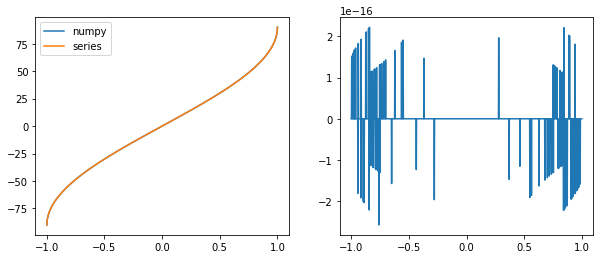

In [16]:
# arcsin()
plt.figure(figsize=(10,4))
x = numpy.linspace(-1,1,1000)
plt.subplot(121)
plt.plot(x, numpy._numpy._numpy.arcsin(x)*180/numpy.pi, label='numpy');
plt.plot(x, numpy.arcsin(x)*180/numpy.pi, label='series');
plt.legend();
plt.subplot(122)
plt.plot(x, ( numpy.arcsin(x) - numpy._numpy._numpy.arcsin(x) ) / numpy.maximum(eps, numpy.abs(numpy.arcsin(x)) ) );

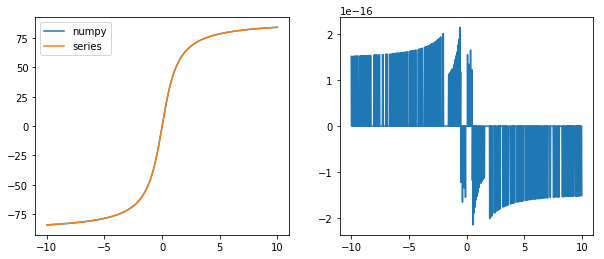

In [17]:
# arctan()
plt.figure(figsize=(10,4))
x = numpy.linspace(-10,10,1000)
plt.subplot(121)
plt.plot(x, numpy._numpy._numpy.arctan(x)*180/numpy.pi, label='numpy');
plt.plot(x, numpy.arctan(x)*180/numpy.pi, label='series');
plt.legend();
plt.subplot(122)
plt.plot(x, ( numpy.arctan(x) - numpy._numpy._numpy.arctan(x) ) / numpy.maximum(eps, numpy.abs(numpy.arctan(x)) ) );

[0. 0.]
-1.0 -0.0 True False


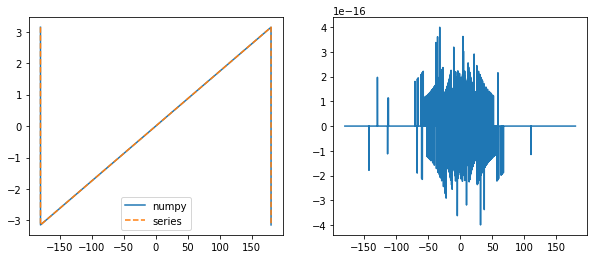

In [18]:
# arctan2()
plt.figure(figsize=(10,4))
a = numpy.linspace(-numpy.pi+0*eps,numpy.pi-0*eps,10001)
x,y = numpy.cos(a), numpy.sin(a)
plt.subplot(121)
plt.plot(a*180/numpy.pi, numpy._numpy._numpy.arctan2(y,x), label='numpy');
plt.plot(a*180/numpy.pi, numpy.arctan2(y,x), '--', label='series');
plt.legend();
plt.subplot(122)
plt.plot(a*180/numpy.pi, ( numpy.arctan2(y,x) - numpy._numpy._numpy.arctan2(y,x) ) / numpy.maximum(eps, numpy.abs(numpy.arctan2(y,x)) ) );
x,y = x[[0,-1]],y[[0,-1]]
x, y, numpy._numpy._numpy.arctan2(y,x), numpy.arctan2(y,x)
print( numpy.arctan2(0.*x,1.+0*x))
print(x[-1],y[-1], y[-1]==0, y[-1]<0)

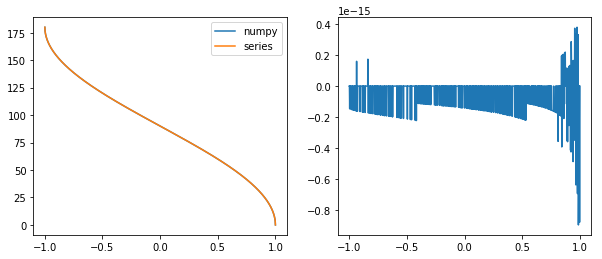

In [19]:
# arccos()
plt.figure(figsize=(10,4))
x = numpy.linspace(-1,1,1000)
plt.subplot(121)
plt.plot(x, numpy._numpy._numpy.arccos(x)*180/numpy.pi, label='numpy');
plt.plot(x, numpy.arccos(x)*180/numpy.pi, label='series');
plt.legend();
plt.subplot(122)
plt.plot(x, ( numpy.arccos(x) - numpy._numpy._numpy.arccos(x) ) / numpy.maximum(eps, numpy.abs(numpy.arccos(x)) ) );